In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_favored_stats = [
    (1, 1, 3),
    
    # (1, 3, 1),
    
    
    (2, 6, 2),
    # (2, 6, 5),
    (3, 5, 1),
    (3, 5, 3),
    (4, 5, 3),
    # (4, 3, 5),
    
    (5, 2, 3),
    (5, 2, 4),
    (5, 1, 3),
    (5, 1, 4),
    
    (6, 2, 5),
    # (6, 1, 5),
    
    (7, 1, 6),
    # (7, 6, 1),
    
    (8, 2, 4),
    # (8, 2, 6),
    
    (9, 6, 3),
    # (9, 3, 6),
    
    (10, 6, 3),
    # (10, 6, 2),
    
    # (11, 4, 2),
    (11, 4, 3),
    
    
    (12, 2, 5),
    (12, 1, 5),
]

species_bonuses = [
    (1, 3, 2),
    (1, 5, 1),
    (2, 1, 2),
    (2, 3, 2),
    (3, 2, 2),
    (3, 4, 1),
    (4, 2, 2),
    (4, 5, 1),
    (5, 2, 2),
    (5, 6, 1),
    (6, 2, 2),
    (6, 6, 1),
    (7, 2, 2),
    (7, 3, 1),
    (9, 1, 2),
    (9, 6, 1),
    (10, 2, 1),
    (10, 5, 2),
    (11, 3, 1), 
    (11, 5, 2),
    (12, 6, 2),
    (13, 1, 2),
    (13, 3, 1),
    (14, 4, 1),
    (14, 6, 2),
    (15, 1, 1),
    (15, 2, 1),
    (15, 3, 1),
    (15, 4, 1),
    (15, 5, 1),
    (15, 6, 1),
    
    (8, 1, 1),
    (8, 2, 1),
    (8, 3, 1),
    (8, 4, 1),
    (8, 5, 1),
    (8, 6, 1),
    
    (12, 1, 1),
    (12, 2, 1),
    (12, 3, 1),
    (12, 4, 1),
    (12, 5, 1)
]

In [3]:
classes = [
    (1, 'Barbarian'),
    (2, 'Bard'),
    (3, 'Cleric'),
    (4, 'Druid'),
    (5, 'Fighter'),
    (6, 'Monk'),
    (7, 'Paladin'),
    (12, 'Ranger'),
    (8, 'Rogue'),
    (9, 'Sorcerer'),
    (10, 'Warlock'),
    (11, 'Wizard'),
    # (13, 'Artificer')
]

species = [
    (9, 'Dragonborn'),

    (1, 'Dwarf (Hill)'),
    (2, 'Dwarf (Mountain)'),
    (3, 'Elf (High)'),
    (4, 'Elf (Wood)'),
    (5, 'Elf (Drow)'),
    (10, 'Gnome (Forest)'),
    (11, 'Gnome (Rock)'),
    (12, 'Half-Elf'),
    (13, 'Half-Orc'),


    (6, 'Halfling (Lightfoot)'),
    (7, 'Halfling (Stout)'),
    (15, 'Human'),
    (8, 'Human Variant'),

    (14, 'Tiefling'),

]

In [4]:
attributes = [1,2,3,4,5,6]
# Attribute mapping
attribute_map = {
    1: 'STR',
    2: 'DEX',
    3: 'CON',
    4: 'INT',
    5: 'WIS',
    6: 'CHA'
}

In [5]:
class_favored_attributes = {}
for i in class_favored_stats:
    class_id = i[0]
    primary_stat = i[1]
    secondary_stat = i[2]
    
    for j in classes:
        if j[1] not in class_favored_attributes:
            class_favored_attributes[j[1]] = [[], []]
        
        if j[0] == i[0]:
            for k in attributes:
                if k == i[1] and k not in class_favored_attributes[j[1]][0]:
                    class_favored_attributes[j[1]][0].append(k)
                elif k == i[2] and k not in class_favored_attributes[j[1]][1]:
                    class_favored_attributes[j[1]][1].append(k)
                    
                    
remapped_class_favored_attributes = {}

for cls, stats in class_favored_attributes.items():
    # Remap the primary and secondary attributes
    primary_attributes = [attribute_map[attr] for attr in stats[0]]
    secondary_attributes = [attribute_map[attr] for attr in stats[1]]
    
    # Store the result in a new dictionary
    remapped_class_favored_attributes[cls] = [primary_attributes, secondary_attributes]

# Output the remapped dictionary
# print(remapped_class_favored_attributes)
                    
species_favored_attributes = {}
for i in species_bonuses:
    species_id = i[0]
    att_bonus = i[1]
    bonus_val = i[2]
    
    for j in species:
        if j[1] not in species_favored_attributes:
            species_favored_attributes[j[1]] = {}
        if j[0] == i[0]:
            for k in attributes:
                if k == i[1]:
                    species_favored_attributes[j[1]][k] = i[2]

In [6]:
class_favored_attributes_renamed = {
    cls: [
        [attribute_map[attr] for attr in primary],
        [attribute_map[attr] for attr in secondary]
    ]
    for cls, (primary, secondary) in class_favored_attributes.items()
}


In [7]:
stats_data = class_favored_attributes_renamed

In [8]:
att_combos = {}
for i in attribute_map.values():
    for j in attribute_map.values():
        if i != j and ((i,j) or (j,i) not in att_combos):
            att_combos[i,j] = []
            
            
            
for key, item in att_combos.items():
    for class_ in stats_data.keys():
        if key[0] in stats_data[class_][0] and key[1] in stats_data[class_][1]:
            att_combos[key].append(class_)
        

att_combos

{('STR', 'DEX'): [],
 ('STR', 'CON'): ['Barbarian', 'Fighter'],
 ('STR', 'INT'): ['Fighter'],
 ('STR', 'WIS'): ['Ranger'],
 ('STR', 'CHA'): ['Paladin'],
 ('DEX', 'STR'): [],
 ('DEX', 'CON'): ['Fighter'],
 ('DEX', 'INT'): ['Fighter', 'Rogue'],
 ('DEX', 'WIS'): ['Monk', 'Ranger'],
 ('DEX', 'CHA'): [],
 ('CON', 'STR'): [],
 ('CON', 'DEX'): [],
 ('CON', 'INT'): [],
 ('CON', 'WIS'): [],
 ('CON', 'CHA'): [],
 ('INT', 'STR'): [],
 ('INT', 'DEX'): [],
 ('INT', 'CON'): ['Wizard'],
 ('INT', 'WIS'): [],
 ('INT', 'CHA'): [],
 ('WIS', 'STR'): ['Cleric'],
 ('WIS', 'DEX'): [],
 ('WIS', 'CON'): ['Cleric', 'Druid'],
 ('WIS', 'INT'): [],
 ('WIS', 'CHA'): [],
 ('CHA', 'STR'): [],
 ('CHA', 'DEX'): ['Bard'],
 ('CHA', 'CON'): ['Sorcerer', 'Warlock'],
 ('CHA', 'INT'): [],
 ('CHA', 'WIS'): []}

In [9]:
species_bonus_dict = {}

# Iterate over the species_favored_attributes
for species, atts in species_favored_attributes.items():
    # Create a nested dictionary for each species with renamed keys
    species_bonus_dict[species] = {}
    for attr_id, bonus_value in atts.items():
        # Use the attribute_map to rename the keys
        attr_name = attribute_map.get(attr_id, f"Unknown ({attr_id})")
        species_bonus_dict[species][attr_name] = bonus_value

In [10]:
class_primary_atts = {}
class_secondary_atts = {}
for key, item in remapped_class_favored_attributes.items():
    class_primary_atts[key] = item[0]
    class_secondary_atts[key] = item[1]

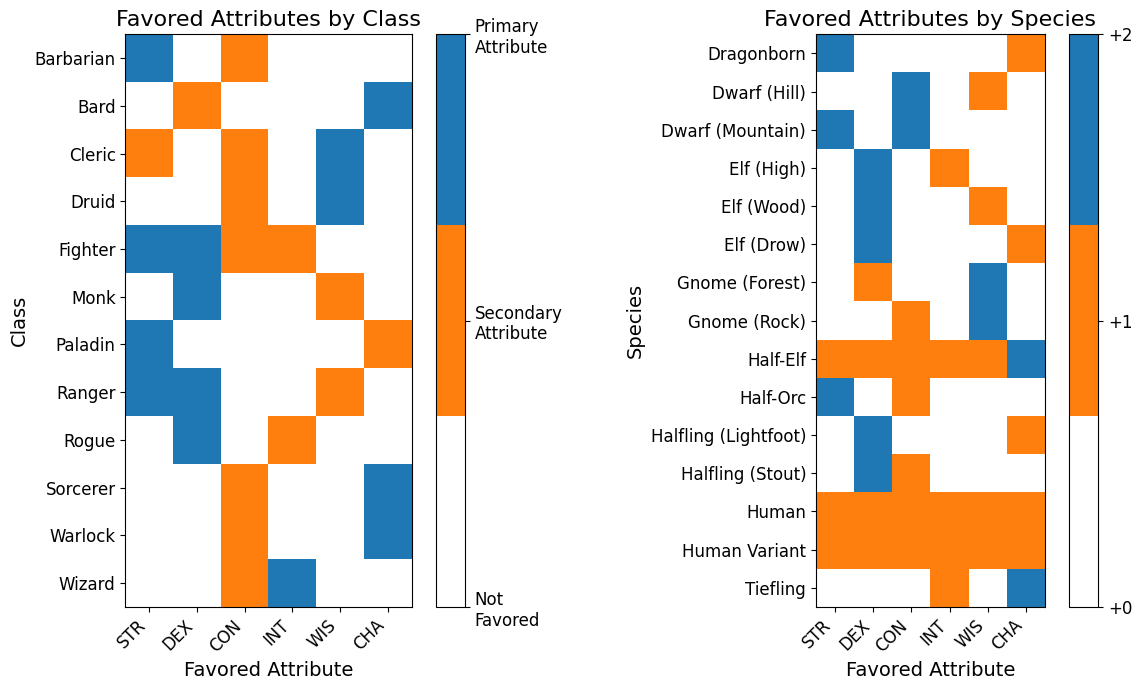

In [11]:

# Reverse map for easy lookup by attribute name (not used directly, but can help later)
reverse_attribute_map = {v: k for k, v in attribute_map.items()}

# Define the attributes list based on the mapping
attributes = list(attribute_map.values())

# Prepare the figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 7))  # 1 row, 2 columns

# ---- Plot for Class Favored Attributes ----
classes = list(class_favored_attributes.keys())
heatmap_matrix_classes = np.zeros((len(classes), len(attributes)), dtype=int)

# Populate the matrix for class favored attributes
for cls_idx, cls in enumerate(classes):
    primary_stats = class_favored_attributes[cls][0]  # Primary stats
    secondary_stats = class_favored_attributes[cls][1]  # Secondary stats

    # Assign Primary stats (Red)
    for stat in primary_stats:
        attr_name = attribute_map[stat]  # Map stat to attribute name
        attr_idx = attributes.index(attr_name)  # Find the index of the attribute
        heatmap_matrix_classes[cls_idx, attr_idx] = 2  # Primary attribute (Red)

    # Assign Secondary stats (Blue)
    for stat in secondary_stats:
        attr_name = attribute_map[stat]  # Map stat to attribute name
        attr_idx = attributes.index(attr_name)  # Find the index of the attribute
        heatmap_matrix_classes[cls_idx, attr_idx] = 1  # Secondary attribute (Blue)

# Define custom colormap: white for none, blue for secondary, red for primary
cmap = plt.cm.colors.ListedColormap(['white', 'C1', 'C0'])

# Plotting the heatmap for classes
im1 = axes[0].imshow(heatmap_matrix_classes, cmap=cmap)

# Setting labels for the first plot (Classes)
axes[0].set_yticks(range(len(classes)))
axes[0].set_yticklabels(classes, fontsize=12)
axes[0].set_xticks(range(len(attributes)))
axes[0].set_xticklabels(attributes, rotation=45, ha='right', fontsize=12)
axes[0].set_xlabel('Favored Attribute', fontsize=14)
axes[0].set_ylabel('Class', fontsize=14)
axes[0].set_title('Favored Attributes by Class', fontsize=16)

# Create the colorbar for the first plot (Classes)
cbar1 = plt.colorbar(im1, ax=axes[0], ticks=[0, 1, 2])
cbar1.set_ticklabels(['Not\nFavored', 'Secondary\nAttribute', 'Primary\nAttribute'], fontsize=12)
# cbar1.set_label('Attribute Favorability', fontsize=14)

# ---- Plot for Species Bonus Attributes ----
species = list(species_bonus_dict.keys())
heatmap_matrix_species = np.zeros((len(species), len(attributes)), dtype=int)

# Populate the matrix for species favored attributes
for cls_idx, cls in enumerate(species):
    for attr, value in species_bonus_dict[cls].items():
        attr_idx = attributes.index(attr)  # Find the index of the attribute
        heatmap_matrix_species[cls_idx, attr_idx] = value  # Bonus value

# Plotting the heatmap for species
im2 = axes[1].imshow(heatmap_matrix_species, cmap=cmap)

# Setting labels for the second plot (Species)
axes[1].set_yticks(range(len(species)))
axes[1].set_yticklabels(species, fontsize=12)
axes[1].set_xticks(range(len(attributes)))
axes[1].set_xticklabels(attributes, rotation=45, ha='right', fontsize=12)
axes[1].set_xlabel('Favored Attribute', fontsize=14)
axes[1].set_ylabel('Species', fontsize=14)
axes[1].set_title('Favored Attributes by Species', fontsize=16)

# Create the colorbar for the second plot (Species)
cbar2 = plt.colorbar(im2, ax=axes[1], ticks=[0, 1, 2])
cbar2.set_ticklabels(['+0', '+1', '+2'], fontsize=12)
# cbar2.set_label(fontsize=14)

# Adjust layout to avoid overlapping and show the plots
plt.tight_layout()

# Show the plot
plt.show()

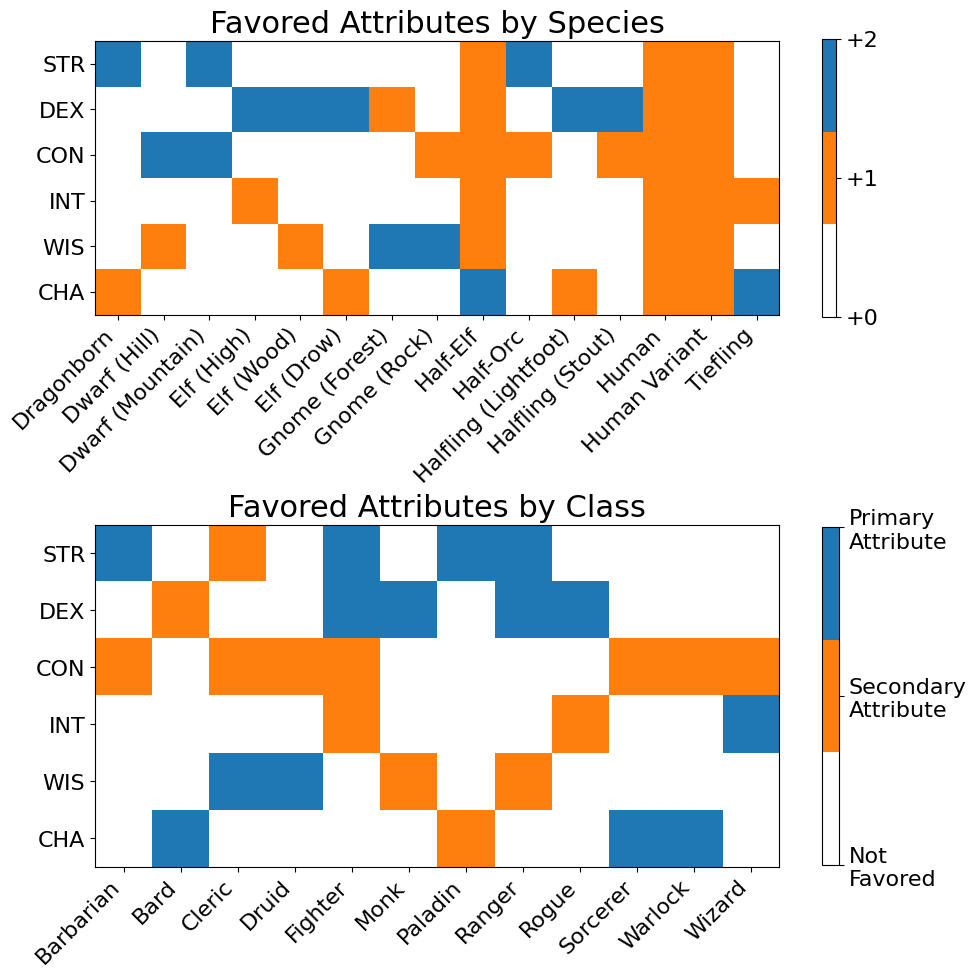

In [12]:
# Transpose the heatmap matrices to swap axes
heatmap_matrix_classes = heatmap_matrix_classes.T
heatmap_matrix_species = heatmap_matrix_species.T

# Prepare the figure for top-to-bottom plots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # 2 rows, 1 column
# ---- Plot for Species Bonus Attributes ----
im2 = axes[0].imshow(heatmap_matrix_species, cmap=cmap)

# Setting labels for the second plot (Species)
axes[0].set_xticks(range(len(species)))
axes[0].set_xticklabels(species, rotation=45, ha='right', fontsize=16)
axes[0].set_yticks(range(len(attributes)))
axes[0].set_yticklabels(attributes, fontsize=16)
# axes[0].set_xlabel('Species', fontsize=14)
# axes[0].set_ylabel('Favored Attribute', fontsize=14)
axes[0].set_title('Favored Attributes by Species', fontsize=22)

# Create the colorbar for the second plot (Species)
cbar2 = plt.colorbar(im2, ax=axes[0], ticks=[0, 1, 2], shrink = 0.75)
cbar2.set_ticklabels(['+0', '+1', '+2'], fontsize=16)

# ---- Plot for Class Favored Attributes ----
im1 = axes[1].imshow(heatmap_matrix_classes, cmap=cmap)

# Setting labels for the first plot (Classes)
axes[1].set_xticks(range(len(classes)))
axes[1].set_xticklabels(classes, rotation=45, ha='right', fontsize=16)
axes[1].set_yticks(range(len(attributes)))
axes[1].set_yticklabels(attributes, fontsize=16)
# axes[1].set_xlabel('Class', fontsize=14)
# axes[1].set_ylabel('Favored Attribute', fontsize=14)
axes[1].set_title('Favored Attributes by Class', fontsize=22)

# Create the colorbar for the first plot (Classes)
cbar1 = plt.colorbar(im1, ax=axes[1], ticks=[0, 1, 2], shrink = 0.91)
cbar1.set_ticklabels(['Not\nFavored', 'Secondary\nAttribute', 'Primary\nAttribute'], fontsize=16)

# fig.supylabel('Favored Attribute', fontsize = 17)
# Adjust layout to avoid overlapping and show the plots
plt.tight_layout()
plt.savefig('favored_attributes.png')
# Show the plot
plt.show()


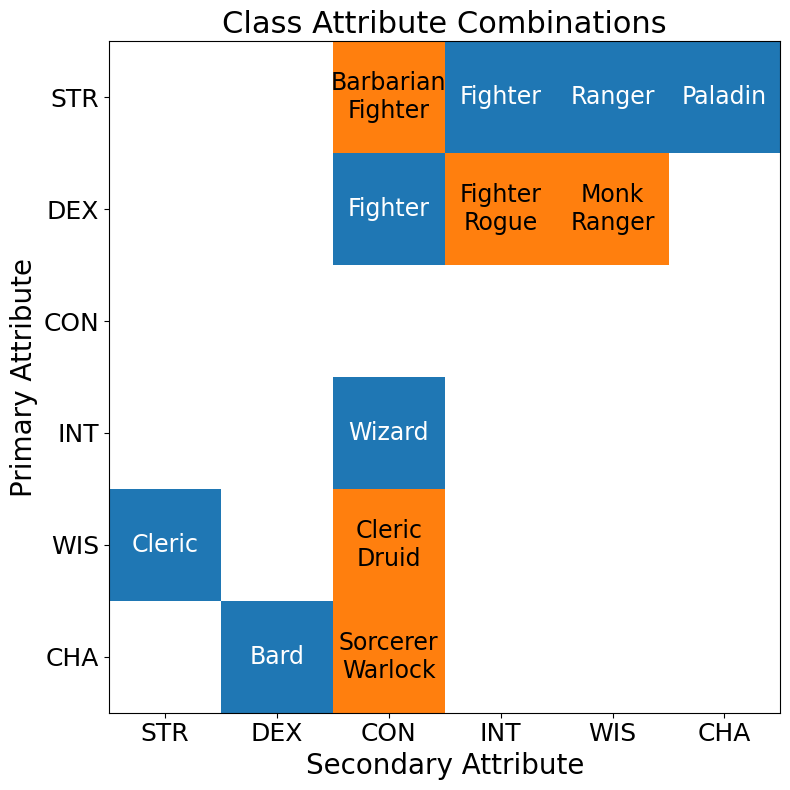

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Attribute labels
attributes = ['STR', 'DEX', 'CON', 'INT', 'WIS', 'CHA']

# Initialize the heatmap matrix
matrix_size = len(attributes)
heatmap_matrix = np.zeros((matrix_size, matrix_size), dtype=int)

# Create a dictionary mapping attribute pairs to matrix indices
attribute_to_index = {attr: idx for idx, attr in enumerate(attributes)}

# Fill the matrix with class counts
for (primary, secondary), classes in att_combos.items():
    row = attribute_to_index[primary]
    col = attribute_to_index[secondary]
    heatmap_matrix[row, col] = min(len(classes), 2)  

# Define a custom colormap with 3 specific colors
cmap = mcolors.ListedColormap(['white', 'C0', 'C1'])
bounds = [0, 1, 2, 3]  # Boundaries for the color levels
norm = mcolors.BoundaryNorm(bounds, cmap.N)

# Create the heatmap plot
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(heatmap_matrix, cmap=cmap, norm=norm)

# Add attribute labels to the axes
ax.set_xticks(range(matrix_size))
ax.set_xticklabels(attributes, fontsize=18)
ax.set_yticks(range(matrix_size))
ax.set_yticklabels(attributes, fontsize=18)
ax.set_xlabel('Secondary Attribute', fontsize=20)
ax.set_ylabel('Primary Attribute', fontsize=20)
ax.set_title('Class Attribute Combinations', fontsize=22)

# Annotate the heatmap with class names, one class per line
for i in range(matrix_size):
    for j in range(matrix_size):
        classes = att_combos.get((attributes[i], attributes[j]), [])
        if classes:
            # Join class names with newline characters
            annotation_text = '\n'.join(classes)
            ax.text(
                j, i,
                annotation_text, 
                ha='center', va='center', 
                fontsize=17, 
                color='black' if heatmap_matrix[i,j] == 2 else 'white'
            )

# Add a colorbar to indicate the number of classes
# cbar = plt.colorbar(im, ax=ax, ticks=[0.5, 1.5, 2.5], orientation='horizontal', pad=0.1)
# cbar.set_ticklabels(['0 Classes', '1 Class', '2+ Classes'])
# cbar.set_label('Number of Classes', fontsize=14)

# Show the plot
plt.tight_layout()
plt.savefig('class_attributes.png')
plt.show()


In [14]:
heatmap_matrix

array([[0, 0, 2, 1, 1, 1],
       [0, 0, 1, 2, 2, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 2, 0, 0, 0],
       [0, 1, 2, 0, 0, 0]])

In [15]:

stats_data = class_favored_attributes
# Extract class and attribute mappings
classes = list(stats_data.keys())
# attributes = sorted(set(attr for sublist in stats_data.values() for stats in sublist for attr in stats))
attributes = attribute_map.values()
num_classes = len(classes)
num_attributes = len(attributes)

# Create a mapping of attributes to classes
primary_attrs = {cls: set(stats[0]) for cls, stats in stats_data.items()}
secondary_attrs = {cls: set(stats[1]) for cls, stats in stats_data.items()}

# Count overlaps for primary, secondary, and primary/secondary combined
overlap_counts = {cls: {'primary': 0, 'secondary':0} for cls in classes}

for cls1 in classes:
    for cls2 in classes:
        if cls1 == cls2:
            continue
        # Primary overlaps
        if primary_attrs[cls1] & primary_attrs[cls2]:
            overlap_counts[cls1]['primary'] += 1
        # Secondary overlaps
        if secondary_attrs[cls1] & secondary_attrs[cls2]:
            overlap_counts[cls1]['secondary'] += 1
        # Combined overlaps
        # if (primary_attrs[cls1] | secondary_attrs[cls1]) & (primary_attrs[cls2] | secondary_attrs[cls2]):
        #     overlap_counts[cls1]['combined'] += 1

# Compute uniqueness scores (fewer overlaps = more unique)
# uniqueness_scores = {cls: 1 / (1 + overlap_counts[cls]['combined']) for cls in classes}

uniqueness_scores = {
    cls: {
    'primary_score': 1 / (1 + overlap_counts[cls]['primary']),
        'secondary_score': 1 / (1 + overlap_counts[cls]['secondary']),
        'combined_score': 1 / (1 + overlap_counts[cls]['primary'] + overlap_counts[cls]['secondary']),   
    }
    for cls in classes

}

# Rank classes by uniqueness
ranked_classes = sorted(uniqueness_scores.items(), key=lambda x: x[1]['combined_score'], reverse=True)

# Display results
print("Class Rankings by Uniqueness:")
for rank, (cls, scores) in enumerate(ranked_classes, 1):
    print(f"{rank}. {cls}:{scores['combined_score']:.4f}")
    


Class Rankings by Uniqueness:
1. Bard:0.3333
2. Paladin:0.2500
3. Monk:0.2000
4. Rogue:0.2000
5. Ranger:0.1429
6. Wizard:0.1429
7. Cleric:0.1250
8. Druid:0.1250
9. Sorcerer:0.1111
10. Warlock:0.1111
11. Barbarian:0.1000
12. Fighter:0.0769


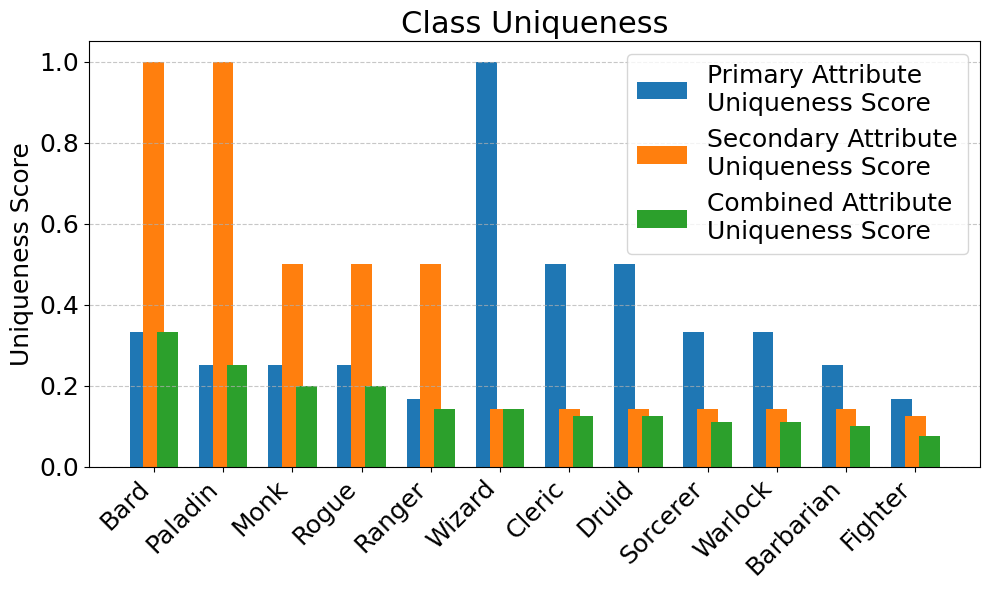

In [16]:
# Redefine data for classes and attributes


classes = list(stats_data.keys())
primary_attrs = {cls: set(stats[0]) for cls, stats in stats_data.items()}
secondary_attrs = {cls: set(stats[1]) for cls, stats in stats_data.items()}

# Revised calculation of overlaps considering primary and secondary attributes separately
revised_overlap_counts = {cls: {'primary': 0, 'secondary': 0} for cls in classes}

# Compare primary and secondary attributes separately
for cls1 in classes:
    for cls2 in classes:
        if cls1 == cls2:
            continue
        # Primary overlaps
        if primary_attrs[cls1] & primary_attrs[cls2]:
            revised_overlap_counts[cls1]['primary'] += 1
        # Secondary overlaps
        if secondary_attrs[cls1] & secondary_attrs[cls2]:
            revised_overlap_counts[cls1]['secondary'] += 1

# Compute scores for primary, secondary, and combined overlaps
revised_uniqueness_scores = {
    cls: {
        'primary_score': 1 / (1 + revised_overlap_counts[cls]['primary']),
        'secondary_score': 1 / (1 + revised_overlap_counts[cls]['secondary']),
        'combined_score': 1 / (1 + revised_overlap_counts[cls]['primary'] + revised_overlap_counts[cls]['secondary']),
    }
    for cls in classes
}

# Sort classes by their combined uniqueness scores in descending order
sorted_classes_by_combined = sorted(
    classes, key=lambda cls: revised_uniqueness_scores[cls]['combined_score'], reverse=True
)

# Reorder scores based on the sorted order of combined scores
primary_scores_sorted = [revised_uniqueness_scores[cls]['primary_score'] for cls in sorted_classes_by_combined]
secondary_scores_sorted = [revised_uniqueness_scores[cls]['secondary_score'] for cls in sorted_classes_by_combined]
combined_scores_sorted = [revised_uniqueness_scores[cls]['combined_score'] for cls in sorted_classes_by_combined]

# Update x positions for sorted order
x_positions_sorted = np.arange(len(sorted_classes_by_combined))

# Plot the sorted scores
plt.figure(figsize=(10, 6))
plt.bar(x_positions_sorted - 0.2, primary_scores_sorted, width=0.3, label='Primary Attribute\nUniqueness Score', color='C0')
plt.bar(x_positions_sorted, secondary_scores_sorted, width=0.3, label='Secondary Attribute\nUniqueness Score', color='C1')
plt.bar(x_positions_sorted + 0.2, combined_scores_sorted, width=0.3, label='Combined Attribute\nUniqueness Score', color='C2')
plt.xticks(x_positions_sorted, sorted_classes_by_combined, rotation=45, ha='right', fontsize=18)
plt.ylabel("Uniqueness Score", fontsize=18)
plt.yticks(fontsize = 18)
plt.title("Class Uniqueness", fontsize=22)
plt.legend(fontsize=18)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('class_uniqueness.png')
plt.show()